In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# added import inspector
from sqlalchemy import inspect

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [28]:
# #Attempted to dynamically save references. This method worked, but I was cautioned about using 'exec()'
# table_dict = {}
# for key in Base.classes.keys():
#     x = f"table_dict['{key}']=Base.classes.{key}"
#     exec(x) #exec method discovered at https://www.w3schools.com/python/ref_func_exec.asp
#     #adapted by me for the inclusion of the "key" variable here by me. Good job, me.
# table_dict
# [print(key+": "+' '.join(map(str,dir( table_dict[key])))) for key in Base.classes.keys()]
# # string to list method from https://www.geeksforgeeks.org/python-program-to-convert-a-list-to-string/

measurement: __abstract__ __class__ __delattr__ __dict__ __dir__ __doc__ __eq__ __format__ __ge__ __getattribute__ __gt__ __hash__ __init__ __init_subclass__ __le__ __lt__ __mapper__ __module__ __ne__ __new__ __reduce__ __reduce_ex__ __repr__ __setattr__ __sizeof__ __str__ __subclasshook__ __table__ __weakref__ _decl_class_registry _sa_class_manager _sa_decl_prepare _sa_raise_deferred_config classes date id metadata prcp prepare station tobs
station: __abstract__ __class__ __delattr__ __dict__ __dir__ __doc__ __eq__ __format__ __ge__ __getattribute__ __gt__ __hash__ __init__ __init_subclass__ __le__ __lt__ __mapper__ __module__ __ne__ __new__ __reduce__ __reduce_ex__ __repr__ __setattr__ __sizeof__ __str__ __subclasshook__ __table__ __weakref__ _decl_class_registry _sa_class_manager _sa_decl_prepare _sa_raise_deferred_config classes elevation id latitude longitude metadata name prepare station


[None, None]

In [36]:
# Save references to each table
# Recreate above using sql "inspector"
inspector = inspect(engine)
for table in inspector.get_table_names():
    vars()[table.title()] = Base.classes[table] # instead of Base.classes.table
    print("Table Name: " + table)
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])
    print("----------------")
# This is a cleaner method and avoids using "exec()" which is vulnerable/not production quality.

Table Name: measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
----------------
Table Name: station
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT
----------------


In [10]:
station

sqlalchemy.ext.automap.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [37]:
# Find the most recent date in the data set.
meas_latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
meas_latest_date[0]

'2017-08-23'

<AxesSubplot:xlabel='date'>

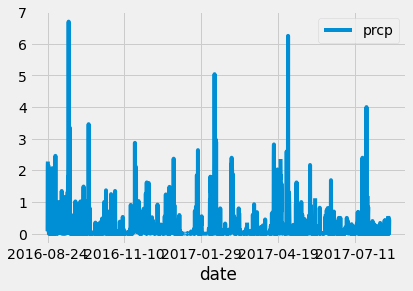

In [47]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculated above.

# Calculate the date one year from the last date in data set.
# From "2017-08-23" 12 mos would be to "2016-08-24" 

# Perform a query to retrieve the data and precipitation scores
meas_recent = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-24").\
    order_by(Measurement.date.asc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
meas_recent_df = pd.DataFrame(meas_recent)
meas_recent_df = meas_recent_df.set_index("date",drop=True)
# Sort the dataframe by date (already done with query)
meas_recent_df

# Use Pandas Plotting with Matplotlib to plot the data
meas_recent_df.plot() # rotate the ticks, put title and axis labels, and stylize



In [50]:
# Use Pandas to calcualte the summary statistics for the precipitation data
meas_recent_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()